# EXPLORATION1
## 인공지능과 가위바위보 하기
### 가위바위보 분류기를 만들자

In [259]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, glob

## 1. 데이터 준비하기
1-1 데이터 불러오기                                                                  
1-2 데이터 Resize하기                                                                  
1-3 클래스 라벨링 하기(가위:0/바위:1/보:2)

In [260]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [261]:
image_dir_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/train/train_scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1229  images to be resized.
1229  images resized.
가위 이미지 resize 완료!


In [262]:
image_dir_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/train/train_rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1213  images to be resized.
1213  images resized.
바위 이미지 resize 완료!


In [263]:
image_dir_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/train/train_paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1224  images to be resized.
1224  images resized.
보 이미지 resize 완료!


In [264]:
def load_data(img_path, number_of_data=3666): 
    # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/train_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/train_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/train_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("train_data 의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

train_data 의 이미지 개수는 3666 입니다.
x_train shape: (3666, 28, 28, 3)
y_train shape: (3666,)


라벨:  0


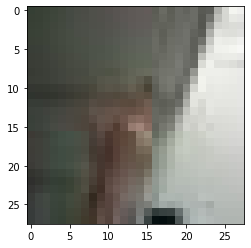

In [265]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [266]:
print(x_train_norm.shape)

(3666, 28, 28, 3)


In [267]:
x_train_reshaped=x_train_norm.reshape(-1,28, 28, 3)
print(x_train_reshaped.shape)

(3666, 28, 28, 3)


## 2. 딥러닝 네트워크 설계하기
2-1 Sequential Model을 사용하여 model 만들기                                      
2-2 model.summary() 메소드를 이용하여 딥러닝 네트워크 모델 확인

In [268]:
n_channel_1=40
n_channel_2=80
n_dense=64
n_train_epoch=3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_train_epoch, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()


Model에 추가된 Layer 개수:  7
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 40)        1120      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 40)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 80)        28880     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 80)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                128064    
_________________________________________________________________
dense_21 (Dense)             

## 3. 딥러닝 네트워크 학습시키기
3-1 model.compile()과 model.fit()을 사용                                         
3-2 accuracy 확인

In [269]:
##딥러닝 네트워크 학습시키기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=30)

Epoch 1/30
115/115 [==============================] - 1s 5ms/step - loss: 1.0736 - accuracy: 0.4187
Epoch 2/30
115/115 [==============================] - 1s 5ms/step - loss: 0.6971 - accuracy: 0.6537
Epoch 3/30
115/115 [==============================] - 1s 4ms/step - loss: 0.5385 - accuracy: 0.7807
Epoch 4/30
115/115 [==============================] - 1s 4ms/step - loss: 0.4592 - accuracy: 0.8082
Epoch 5/30
115/115 [==============================] - 0s 4ms/step - loss: 0.3659 - accuracy: 0.8491
Epoch 6/30
115/115 [==============================] - 0s 4ms/step - loss: 0.3131 - accuracy: 0.8830
Epoch 7/30
115/115 [==============================] - 0s 4ms/step - loss: 0.2615 - accuracy: 0.9095
Epoch 8/30
115/115 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.9197
Epoch 9/30
115/115 [==============================] - 0s 4ms/step - loss: 0.2110 - accuracy: 0.9153
Epoch 10/30
115/115 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9278

## 4. 테스트 데이터로 성능 확인하기
4-1 x_test 데이터 만들기                                                                  
4-2 model.evaluate() 로 accuracy 확인

In [270]:
test_img_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/test/scissor"
resize_images(test_img_path)

print("가위 이미지 resize 완료!")

111  images to be resized.
111  images resized.
가위 이미지 resize 완료!


In [271]:
test_img_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/test/rock"
resize_images(test_img_path)

print("바위 이미지 resize 완료!")

122  images to be resized.
122  images resized.
바위 이미지 resize 완료!


In [272]:
test_img_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/test/paper"
resize_images(test_img_path)

print("보 이미지 resize 완료!")

117  images to be resized.
117  images resized.
보 이미지 resize 완료!


In [273]:
def load_data(test_img_path, number_of_data=350): 
    # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(test_img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(test_img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(test_img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("test_data 의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_img_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/test"
(x_test, y_test)=load_data(test_img_path,350)
x_test_norm = x_test/255 # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test_data 의 이미지 개수는 350 입니다.
x_test shape: (350, 28, 28, 3)
y_test shape: (350,)


In [274]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11/11 - 0s - loss: 5308.2891 - accuracy: 0.3486
test_loss: 5308.2890625 
test_accuracy: 0.34857141971588135


## 5. 예측
5-1 model.predict()를 사용하여 model이 입력값을 보고 실제로 추론한 확률분포를 출력

In [275]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0. 1. 0.]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [0. 1. 0.]
라벨: 2, 예측결과: 1


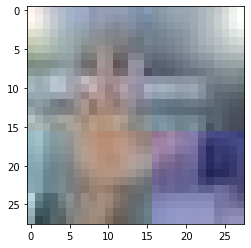

예측확률분포: [0. 1. 0.]
라벨: 0, 예측결과: 1


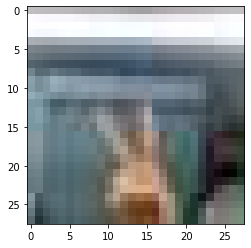

예측확률분포: [0. 1. 0.]
라벨: 0, 예측결과: 1


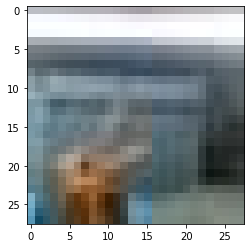

예측확률분포: [0. 1. 0.]
라벨: 2, 예측결과: 1


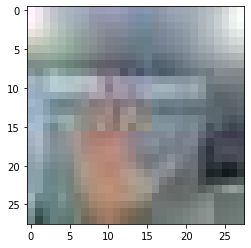

예측확률분포: [0. 1. 0.]
라벨: 0, 예측결과: 1


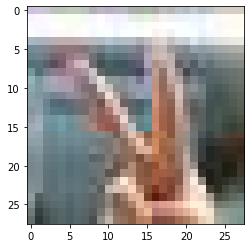

In [276]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list에서 random한 5개 확인
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()